In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
def cm_plot(y_test, y_pred):

    cm = confusion_matrix(y_test, y_pred)
    # Normalise
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cmn, cmap='Blues', annot=True, fmt='.2f')
    sns.set(font_scale=1.3)
    plt.title("Confusion Matrix")

    return plt.show()


In [3]:
X_train = np.load("/kaggle/input/neymark-tsc/train_x.npy")
y_train = np.load("/kaggle/input/neymark-tsc/train_y.npy")
X_test_real = np.load("/kaggle/input/neymark-tsc/test_x.npy")


In [4]:
X_train.shape

(14667, 187)

In [5]:
X_test_real.shape

(7225, 187)

In [6]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 25.9 MB/s eta 0:00:0000:0100:01


In [7]:
from sklearn.metrics import f1_score
from sktime.classification.kernel_based import RocketClassifier
rocket_classifier = RocketClassifier(num_kernels=5000, random_state=7)
rocket_classifier.fit(X_train, y_train)
y_pred_train = rocket_classifier.predict(X_train)

In [8]:
print(f'F1 on train: {f1_score(y_train, y_pred_train, average="macro")}')

F1 on train: 0.9333587632815246


In [9]:
print(f"Confusion matrix for train:\n {confusion_matrix(y_train, y_pred_train)}")

Confusion matrix for train:
 [[12099     1     2     0     0]
 [  106   270     2     0     0]
 [   26     0   964     2     1]
 [   19     0     4    80     0]
 [    9     0     0     0  1082]]


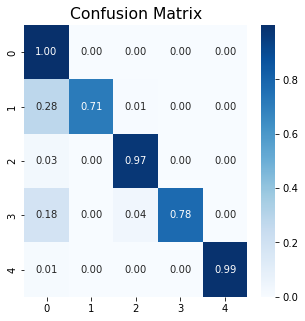

In [10]:
cm_plot(y_train, y_pred_train)

In [11]:
y_pred = rocket_classifier.predict(X_test_real)


In [12]:
# y_pred_csv = pd.DataFrame(list(range(len(y_pred))), columns=["Id"])
y_pred_csv = pd.DataFrame()
y_pred_csv["ID"] = np.array(range(len(y_pred))).astype(int).astype(str)
y_pred_csv["Answer"] = np.array(y_pred).astype(int).astype(str)
y_pred_csv.to_csv("testing_submission.csv", index=False)
y_pred_csv

,ID,Answer
0,0,0
1,1,0
2,2,0
3,3,2
4,4,0
...,...,...
7220,7220,0
7221,7221,2
7222,7222,0
7223,7223,0
